In [ ]:
if (!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("BiocManager")

In [ ]:
BiocManager::install("DESeq2")

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.2 (2021-11-01)

Warning message:
“package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'DESeq2'”
Old packages: 'backports', 'brio', 'cpp11', 'credentials', 'devtools',
  'digest', 'fs', 'glue', 'memoise', 'openssl', 'pkgbuild', 'pkgload', 'readr',
  'remotes', 'stringi', 'vroom', 'withr', 'xml2', 'nlme'



In [ ]:
install.packages("pheatmap")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library("DESeq2")
library("pheatmap")

In [ ]:
info <- data.frame( row.names = c("c1", "c2", "c3", "r1", "r2","r3"),
                   id = c("SRR3414635", "SRR3414636", "SRR3414637","SRR3414629", "SRR3414630", "SRR3414631"), 
                   condition = c("control", "control", "control", "reprogramming", "reprogramming", "reprogramming"))

counts <- as.matrix(read.csv("ALL.counts", header=TRUE, row.names = 1))

dds <- DESeqDataSetFromMatrix(countData = counts, colData = info, design = ~ condition)


Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


In [ ]:
head(info)

,id,condition
,<chr>,<chr>
c1,SRR3414635,control
c2,SRR3414636,control
c3,SRR3414637,control
r1,SRR3414629,reprogramming
r2,SRR3414630,reprogramming
r3,SRR3414631,reprogramming


In [ ]:
head(counts)

,c1,c2,c3,r1,r2,r3
ENSMUSG00000000001.4,3431,3504,4031,4489,3919,5700
ENSMUSG00000000003.15,0,0,0,0,0,0
ENSMUSG00000000028.15,150,136,152,345,273,468
ENSMUSG00000000031.16,55526,48225,56064,64504,33249,64992
ENSMUSG00000000037.17,41,44,52,77,68,87
ENSMUSG00000000049.11,10,8,10,4,1,1


In [ ]:
# Tell the DDS which columns correspond to the 'reference' level of gene expression
dds$condition <- relevel(dds$condition, ref="control")

dds <- DESeq(dds)
res <- results(dds, alpha=0.01)   # Specify a more strict threshold on padj. This threshold is called 'alpha'


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



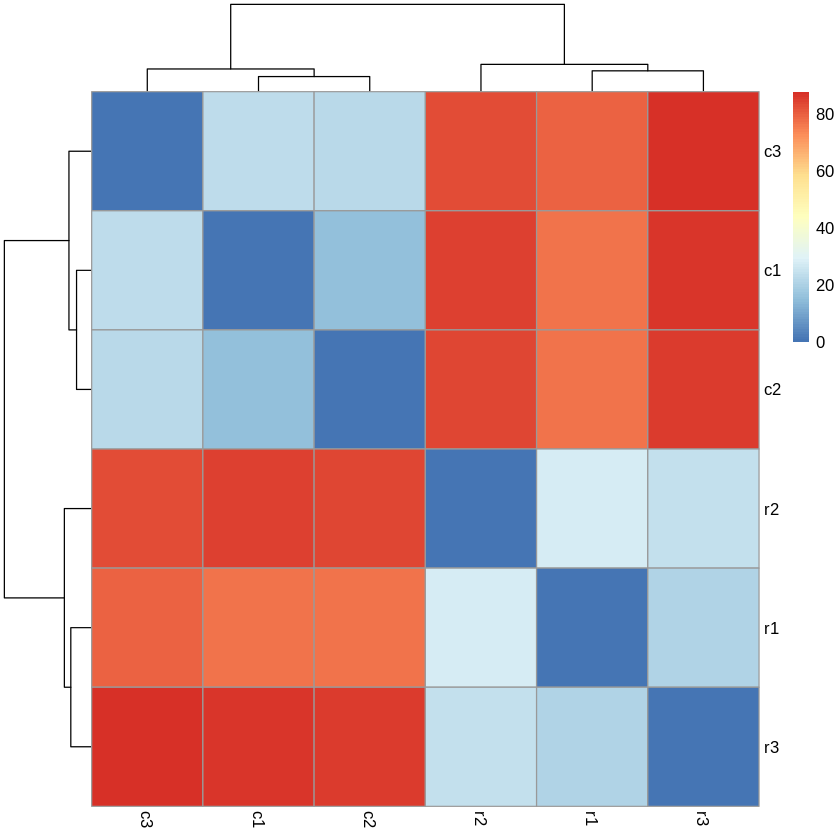

In [ ]:
rld <- rlog(dds)
sampleDists <- dist(t(assay(rld)))
sampleDistMatrix <- as.matrix(sampleDists)
pheatmap(sampleDistMatrix, clustering_distance_rows=sampleDists, clustering_distance_cols=sampleDists)


In [ ]:
resOrdered <- res[order(res$padj),]
resSignificant <- subset(resOrdered, padj < 0.01)
write.table(resSignificant, "differentially_expressed_genes.txt", sep="\t", row.names=TRUE, quote = FALSE)

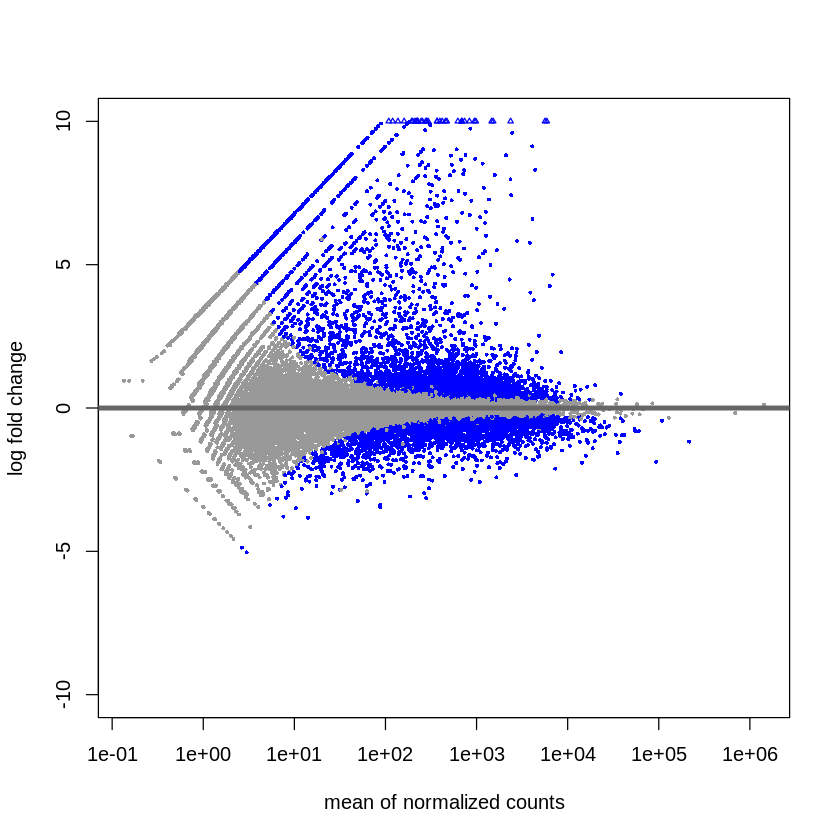

In [ ]:
plotMA(res, ylim=c(-10,10))

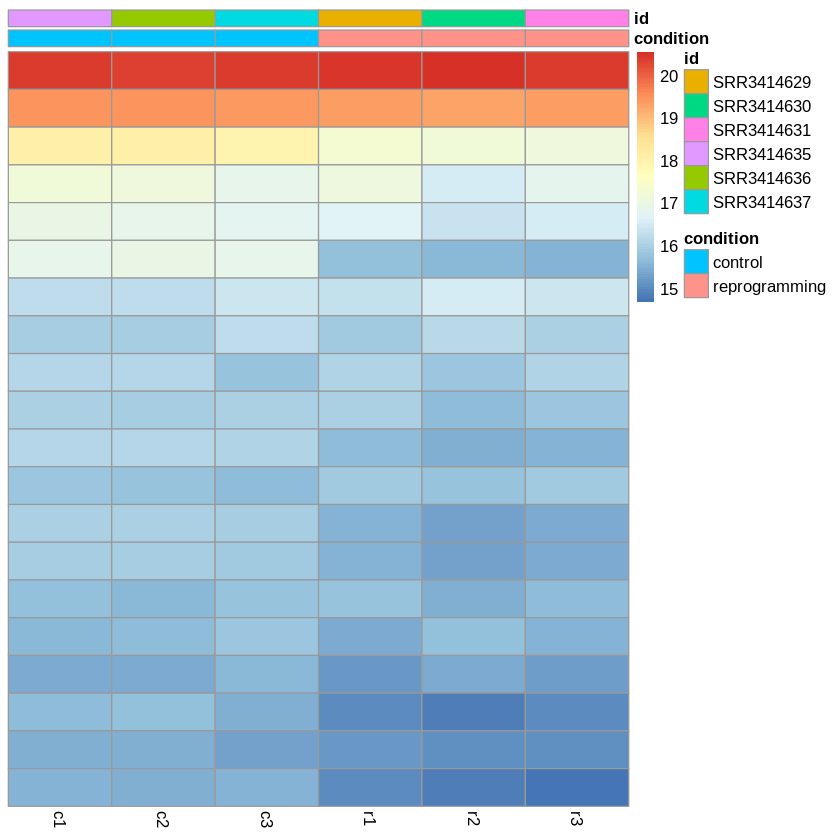

In [ ]:
select <- order(rowMeans(counts(dds,normalized=TRUE)),decreasing=TRUE)[1:20]
df <- as.data.frame(colData(dds)[,c("condition","id")])
pheatmap(assay(rld)[select,], cluster_rows=FALSE, show_rownames=FALSE,cluster_cols=FALSE, annotation_col=df)




*   Ищем значимо изменившие экспрессию гены

*   Возьмем 2 наиболее значимых для графиков







log2 fold change (MLE): condition reprogramming vs control 
Wald test p-value: condition reprogramming vs control 
DataFrame with 1 row and 6 columns
                       baseMean log2FoldChange     lfcSE      stat    pvalue
                      <numeric>      <numeric> <numeric> <numeric> <numeric>
ENSMUSG00000000303.12   2782.23        5.82553  0.143004   40.7369         0
                           padj
                      <numeric>
ENSMUSG00000000303.12         0

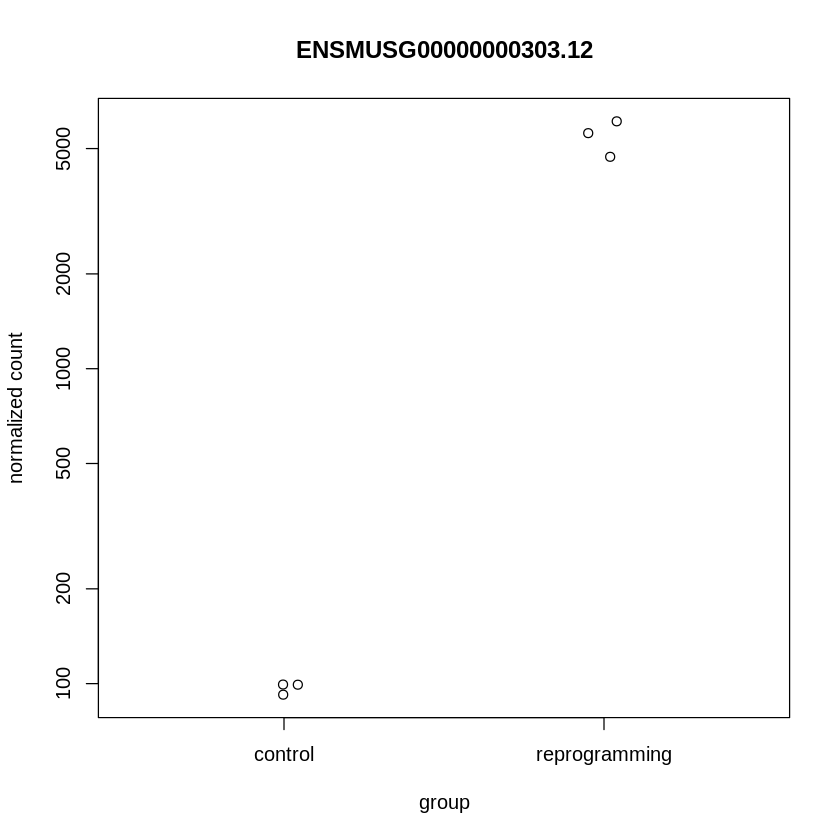

In [ ]:
resSignificant[1,]
plotCounts(dds, gene = "ENSMUSG00000000303.12", intgroup="condition")

log2 fold change (MLE): condition reprogramming vs control 
Wald test p-value: condition reprogramming vs control 
DataFrame with 1 row and 6 columns
                      baseMean log2FoldChange     lfcSE      stat    pvalue
                     <numeric>      <numeric> <numeric> <numeric> <numeric>
ENSMUSG00000025608.9   4401.66        8.31228  0.197511   42.0852         0
                          padj
                     <numeric>
ENSMUSG00000025608.9         0

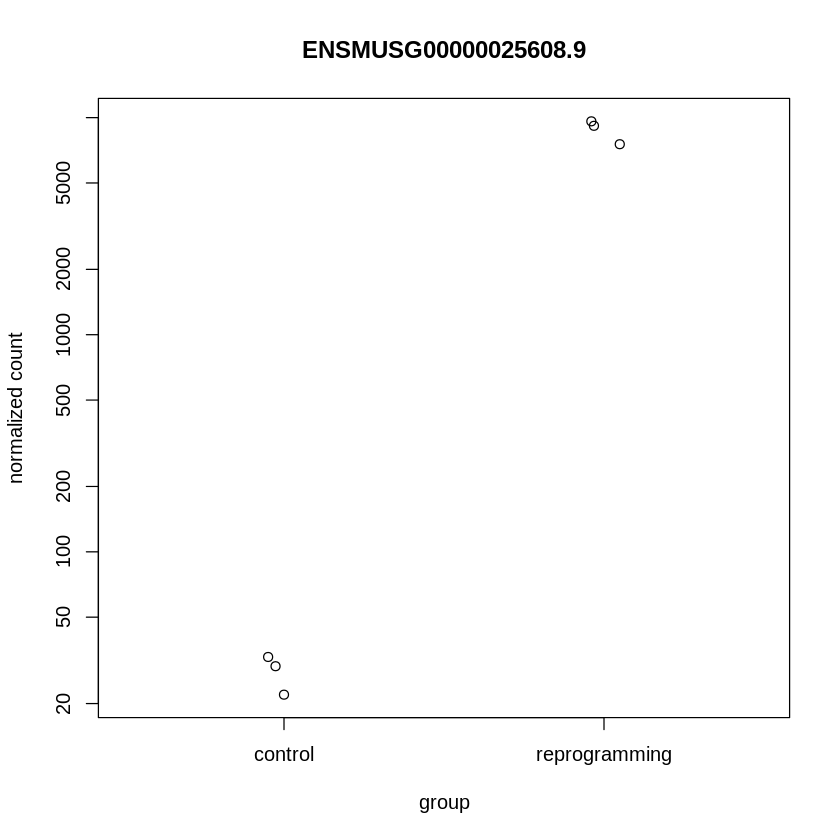

In [ ]:
resSignificant[2,]
plotCounts(dds, gene = "ENSMUSG00000025608.9", intgroup="condition")



*   Далее я сделал табличку для отчета на гитхабе, данные из колабов
 



In [85]:
allstats <- data.frame( "ID" = c("SRR3414635", "SRR3414636", "SRR3414637","SRR3414629", "SRR3414630", "SRR3414631"), 
"Тип образца" = c("control", "control", "control", "reprogramming", "reprogramming", "reprogramming"), 
"Исходные чтения" = c(20956475, 20307147, 20385570, 21106089, 15244711, 24244069 ), 
"Успешно откартированные чтения" = c(20395865, 19757059, 19847291, 20510113, 14832680, 235547686), 
"Процент этих чтений" = c("97.32%", "97.29%", "97.36%", "97.18%", "97.30%", "97.13%"),
"Уникально откартированные чтения" = c(18428317, 17825380, 17844858, 18375888, 13186139, 20928945),
"Процент этих чтений" = c("87.94%", "87.78%", "87.54%", "87.06%", "86.50%", "86.33%"),
 "Чтения, которые попали на гены" = c(16275997, 15757580, 15736978, 16049609, 11465324, 18408851))
allstats

ID,Тип.образца,Исходные.чтения,Успешно.откартированные.чтения,Процент.этих.чтений,Уникально.откартированные.чтения,Процент.этих.чтений.1,Чтения..которые.попали.на.гены
<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
SRR3414635,control,20956475,20395865,97.32%,18428317,87.94%,16275997
SRR3414636,control,20307147,19757059,97.29%,17825380,87.78%,15757580
SRR3414637,control,20385570,19847291,97.36%,17844858,87.54%,15736978
SRR3414629,reprogramming,21106089,20510113,97.18%,18375888,87.06%,16049609
SRR3414630,reprogramming,15244711,14832680,97.30%,13186139,86.50%,11465324
SRR3414631,reprogramming,24244069,235547686,97.13%,20928945,86.33%,18408851
